In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt   #importing Libraries
import numpy as np

#The Data Visualiaztion part is complete here.
#next, on the basis of the data visualized, we will select the features 
#and change them accordingly to form the classification algorithm.

df = pd.read_csv("bank_clean.csv")
df.drop("age_group",axis = 1, inplace = True)  #loading the cleanest data 
df.drop("balance_group",axis = 1, inplace = True)

#Only the most relevant customer information is considered,i.e job title, education, age, balance, 
#default record, housing record and loan record. Other information, such as ‘the number of contacts performed 
#before this campaign’, is omitted because it is not directly related to customers themselves.

df.drop("marital",axis = 1,inplace = True)   #most relevant attributes loaded
dataset1 = df.iloc[:,:7]
dataset1.head(10)


,age,job,education,default,balance,housing,loan
0,58,management,tertiary,no,2143,yes,no
1,44,technician,secondary,no,29,yes,no
2,33,entrepreneur,secondary,no,2,yes,yes
3,35,management,tertiary,no,231,yes,no
4,28,management,tertiary,no,447,yes,yes
5,42,entrepreneur,tertiary,yes,2,yes,no
6,58,retired,primary,no,121,yes,no
7,43,technician,secondary,no,593,yes,no
8,41,admin.,secondary,no,270,yes,no
9,29,admin.,secondary,no,390,yes,no


In [3]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])         #getting the dummy variables for job and education
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
#dataset2 = pd.get_dummies(dataset2, columns = ["campaign"])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0}) 
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
#mapping the housing and default attribute to 1 and 0

dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})   
dataset_response = pd.DataFrame(df['response_binary'])  
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)
#merging the main atributes with target variable
dataset2.to_csv("dummy.csv")
dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response_binary
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,0,231,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,0,447,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,42,1,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,58,0,121,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7,43,0,593,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8,41,0,270,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,29,0,390,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
arr = dataset2.values  #making an array 
X = arr[:,:20] #features
Y = arr[:,-1]  #target

In [5]:
from sklearn.model_selection import train_test_split      #importing modules from libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 9) 
#splitting the dataset into test and train datasets.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier      #using two different models to check the accuracy

model = []      #making an empty list
model.append(('LR', LogisticRegression()))   #adding the two models to be used inthis list
model.append(('KNN', KNeighborsClassifier()))
#model
results = []   #making two empty lists
names = []

for name,models in model:
    kfold = KFold(n_splits = 10, random_state= 9)   #no. of folds
    crossvalidation_R = cross_val_score(models, X_train,Y_train,cv = kfold,scoring = 'accuracy')
    #applying crossvalidation
    results.append(crossvalidation_R)
    #print(crossvalidation_R)
    names.append(name)   
    msg = "%s: %f (%f)" % (name, crossvalidation_R.mean(), crossvalidation_R.std())
    #printing the mean of cv accuracy  SD 
    print(msg)
    


LR: 0.885804 (0.003574)
KNN: 0.873806 (0.004587)


In [6]:
#As the Logistic Regression is the better performing model. Testing will be done on this one

LR = LogisticRegression()
LR.fit(X_train, Y_train)    #fitting the LR model on test dataset 
predictions = LR.predict(X_test)  #making the predictions 
print("Accuracy score: ",accuracy_score(Y_test,predictions)) #printing the Accuracy of the predictions 

Accuracy score:  0.8884808422083487


[[7258    1]
 [ 910    0]]


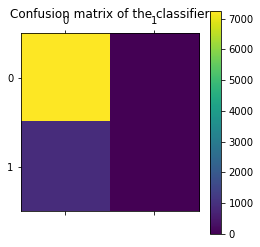

In [7]:
from sklearn.metrics import confusion_matrix  #importing confusion matrix
import pylab as pl   

print(confusion_matrix(Y_test, predictions))  #printing confusion matrix
cm = confusion_matrix(Y_test, predictions)   
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')   #graphical representation of confusion matrix
pl.colorbar()
pl.show()



In [8]:
# Classification Report
from sklearn.metrics import classification_report   
print(classification_report(Y_test, predictions))  #printing Classification report of the predictions.

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7259
           1       0.00      0.00      0.00       910

   micro avg       0.89      0.89      0.89      8169
   macro avg       0.44      0.50      0.47      8169
weighted avg       0.79      0.89      0.84      8169

